In [1]:
#show the project in general!
#elections for Obama and if events change voters sentiments and look at the questions 
#we will check donations datasets for each candidate Obama, Romney, McKane etc
#we will look at best practices for showing data 
#also will check professions how they are voting etc

# ELECTION DAY

In this Data Project we will be looking at data from 2012 election.
In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer aome questions:

1.) who was being polled and what was their party affiltion?
2.) Did the poll results favor Romney or Obama?
3.) how do undecided voters effect the poll?
4.) Can we account for the undecided voters?
5.) How did voter sentiment change over time?
6.) Can we see an effect in the pools from the debates?

In [5]:
#for data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
#we will use this dataset
genDatasetUrl = 'https://elections.huffingtonpost.com/pollster'

In [7]:
#we will work with REQUESTS API for gathering information from the web
requestsUrl =  'https://requests.kennethreitz.org/en/master/'

In [8]:
#convert dataformat for numpy
convertUrl = 'https://pymotw.com/2/StringIO/'

In [9]:
import requests
import io
from io import StringIO

In [10]:
#dataset url
url = 'https://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'
source = requests.get(url).text

In [11]:
type(source)

str

In [12]:
poll_data = io.StringIO(source)

In [13]:
poll_data

In [14]:
poll_df = pd.read_csv(poll_data)

In [15]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [16]:
poll_df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
5,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,NaN,1
6,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05T18:30:15Z,3000.0,Likely Voters,Live Phone,49.0,48.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,NaN,1
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05T16:12:48Z,4725.0,Likely Voters,Internet,48.0,46.0,4.0,2.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,None,NaN,1
8,ARG,2012-11-02,2012-11-04,2012-11-05T13:06:54Z,1200.0,Likely Voters,Live Phone,49.0,49.0,1.0,1.0,http://elections.huffingtonpost.com/pollster/p...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,None,NaN,1
9,PPP (D-Americans United for Change),2012-11-02,2012-11-04,2012-11-04T22:32:19Z,1200.0,Likely Voters,Automated Phone,50.0,48.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2011/PP...,Sponsor,Dem,NaN,1


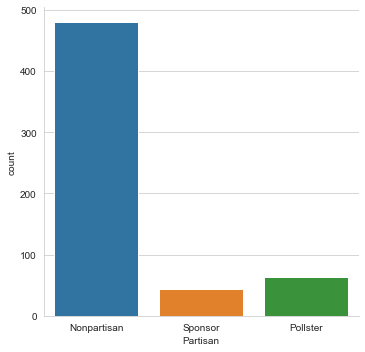

In [17]:
sns.catplot('Partisan',data=poll_df,kind="count") #https://seaborn.pydata.org/generated/seaborn.catplot.html

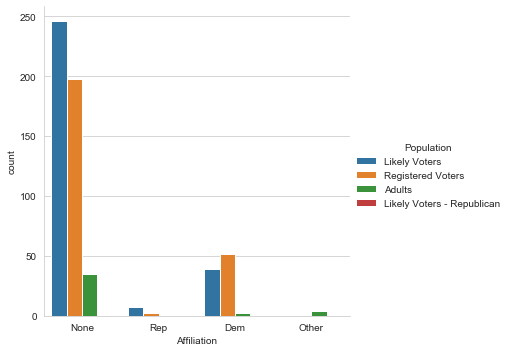

In [18]:
sns.catplot(x="Affiliation", hue='Population',data=poll_df,kind="count")

In [19]:
avg = pd.DataFrame(poll_df.mean())
avg.drop('Number of Observations', axis=0,inplace=True)

In [20]:
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN


In [21]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)

In [22]:
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726
Question Text,NaN


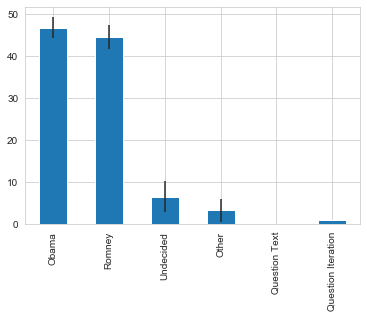

In [23]:
avg.plot(yerr=std,kind='bar',legend=False)

In [24]:
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ['Average','STD']
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


In [25]:
#SECOND PART

In [26]:
#HOW CAN WE TAKE INTO ACCOUNT THE DIFFERENCE BETWEEN OBAMA AND ROMNEY

In [27]:
#WE CAN TAKE A QUICK TIME SERIES OF TIME ANALYSIS OF VOTERS SENTIMENTS AND CHECK OUR DATAFRAME AGAIN

In [28]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [29]:
#plot the favour of obama romney and undecided voters over time

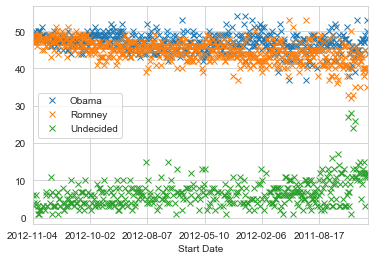

In [34]:
poll_df.plot(x='Start Date',y=['Obama','Romney','Undecided'],linestyle='',marker='x')

In [35]:
#interesting to see how Obama and Romney get closer towards elections

In [36]:
#check the difference between O and R during time

In [37]:
#we will add a new column in the DataFrame! 

In [39]:
from datetime import datetime #use it as time stamp

In [41]:
poll_df['Difference']=(poll_df.Obama - poll_df.Romney)/100 #we are speaking in terms of percentage points
poll_df.head() #scrolling to the right you see the Difference column in the dataframe

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [42]:
# a positive difference means leaning towards Obama negative Romney

In [45]:
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


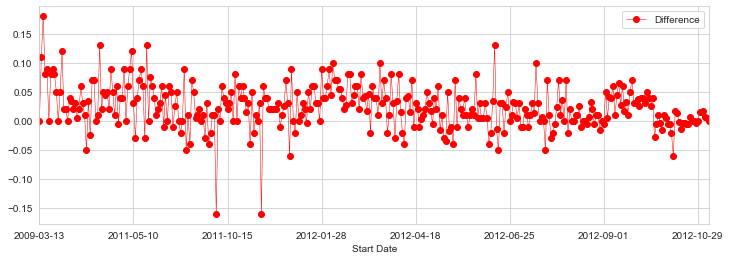

In [68]:
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',linewidth=0.5,color='red')

In [50]:
#obama was in the lead for most of the years but you can see in october something happend. 
#would be interesting to see what in the news!

In [53]:
#we know debates happens in October 2012. Let's mark down those debates 
#we will work with the index of Oct 2012. We will find this row now.
row_in = 0
xlimit = []

#will cycle over the index until the date i want to find
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10': #if the first 7 letters are equal to the date i need to find
        xlimit.append(row_in)
        row_in +=1
    else: #otherwise keep counting
        row_in +=1

#now we print the values
min(xlimit)

325

In [52]:
max(xlimit)

352

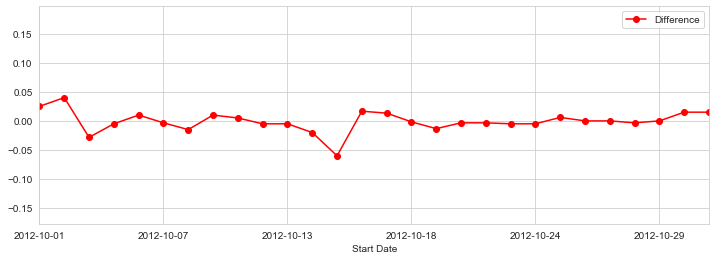

In [55]:
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='red', xlim=(325,352))

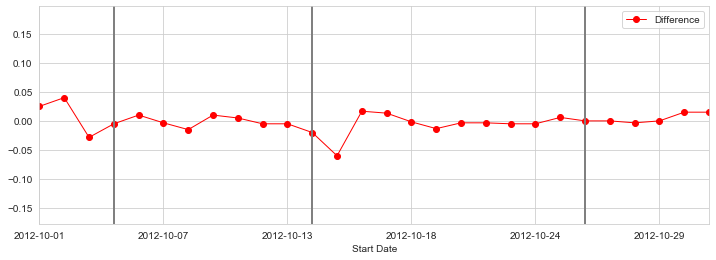

In [67]:
#we plots some lines now according to the specific dates of the debates and if there was any change 
#about the sentiments of the voters
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='red',linewidth=1, xlim=(325,352))
#oct 3rd
plt.axvline(x=325+3, linewidth=2, color='grey')
#oct 11th
plt.axvline(x=325+11, linewidth=2, color='grey')
#oct 22nd
plt.axvline(x=325+22, linewidth=2, color='grey')